In [2]:
import numpy as np
import csv
data_folder = "../models/"


In [3]:
def read_hydrodynamics():
    data = []
    
    with open(data_folder + "hydrodynamics.csv", newline='') as csv_file:
        dataset_reader = csv.reader(csv_file, delimiter=',')
        next(dataset_reader)
        for row in dataset_reader:
            row = list(map(float, row))
            data.append(np.array([np.array(row[:-1]), row[-1]]))

    return np.array(data)


In [4]:
def read_noisysine():
    data = []
    
    with open(data_folder + "noisysine.csv", newline='') as csv_file:
        dataset_reader = csv.reader(csv_file, delimiter=',')
        next(dataset_reader)
        for row in dataset_reader:
            row = list(map(float, row))
            data.append(np.array([np.array(row[:-1]), row[-1]]))

    return np.array(data)


In [5]:

def extract_labels(data):
    values = np.array([row[0] for row in data])
    labels = np.array([row[1] for row in data])
    
    return values, labels


In [6]:
noisysine_values, noisysine_labels = extract_labels(read_noisysine())



In [7]:
hydrodynamics_values, hydrodynamics_labels = extract_labels(read_hydrodynamics())


In [133]:
from sklearn.model_selection import train_test_split

noisysine_values_train, noisysine_values_test, noisysine_labels_train, noisysine_labels_test =\
    train_test_split(noisysine_values, noisysine_labels, test_size=0.2)


In [111]:
from sklearn.model_selection import train_test_split
hydrodynamics_values_train, hydrodynamics_values_test, hydrodynamics_labels_train, hydrodynamics_labels_test =\
    train_test_split(hydrodynamics_values, hydrodynamics_labels, test_size=0.2)


In [3]:
import matplotlib.pyplot as plt

def plot_regressions(values, labels, results_x, results_y, title):
    plt.scatter(values, labels, color='black')
    for i in range(len(results_x)):
        t = "deg=" + str(i+1)
        result_x = results_x[i]
        result_y = results_y[i]
        
        sorted_args = np.argsort(result_x, axis=0)
        plt.plot(result_x[sorted_args].reshape(result_x.shape), result_y[sorted_args].reshape(result_y.shape), label=t)
        plt.xticks(())
        plt.yticks(())
    
    plt.legend()
    plt.title(title)
    plt.show()
    

In [100]:

class LinearRegression:
    def __init__(self, values, labels, degree):
        self.features = PolynomialFeatures(degree=degree)
        values_trans = self.features.fit_transform(values)
        self.w = np.linalg.inv(np.transpose(values_trans) @ values_trans) @ np.transpose(values_trans) @ labels
    
    def predict(self, values):
        return self.features.fit_transform(values) @ self.w


Noisysine Linear
deg=1; r2=0.2633008133628981
deg=2; r2=0.26107454812859376
deg=3; r2=0.36424824073913253
deg=4; r2=0.23750250892143043
deg=5; r2=0.9034431838056048


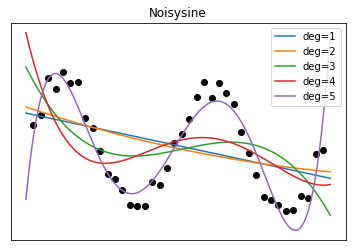

In [139]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

def task1_noisysine():
    ress_x = []
    ress_y = []
    print("Noisysine Linear")
    for degree in range(1, 6):
        regr = LinearRegression(noisysine_values_train, noisysine_labels_train, degree)
        labels = regr.predict(noisysine_values_test)
        r2 = r2_score(noisysine_labels_test, labels)
        print("deg=" + str(degree) + "; r2=" + str(r2))
        values_min, values_max = noisysine_values.min() - 1, noisysine_values.max() + 1
        res_x = np.arange(values_min, values_max, 0.01).reshape(-1, 1)
        res_y = regr.predict(res_x)
        ress_x.append(res_x)
        ress_y.append(res_y)
    
    plot_regressions(noisysine_values, noisysine_labels, ress_x, ress_y, "Noisysine")
        
        
task1_noisysine()


In [138]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

def task1_hydrodynamics():
    print("Hydrodynamics Linear")
    for degree in range(1, 3):
        regr = LinearRegression(hydrodynamics_values_train, hydrodynamics_labels_train, degree)
        labels = regr.predict(hydrodynamics_values_test)
        r2 = r2_score(hydrodynamics_labels_test, labels)
        print("deg=" + str(degree) + "; r2=" + str(r2))
        
        
task1_hydrodynamics()


Hydrodynamics Linear
deg=1; r2=0.6216059177789438
deg=2; r2=0.8906371848316718


In [105]:
class RidgeRegression:
    def __init__(self, values, labels, degree, alpha):
        self.features = PolynomialFeatures(degree=degree)
        values_trans = self.features.fit_transform(values)
        self.w = np.linalg.inv(np.transpose(values_trans) @ values_trans + alpha * np.identity(values_trans.shape[1])) @ np.transpose(values_trans) @ labels
        
    def predict(self, values):
        return self.features.fit_transform(values) @ self.w
    

Noisysine Ridge
deg=1; r2=-0.12399365988727507; best_alpha=1e-14
deg=2; r2=-0.12514124212136424; best_alpha=1e-15
deg=3; r2=0.11075577279680704; best_alpha=1e-13
deg=4; r2=0.10001102125173988; best_alpha=1e-13
deg=5; r2=0.9116192728084224; best_alpha=1


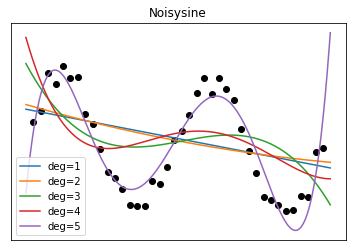

In [122]:
def task2_noisysine():
    ress_x = []
    ress_y = []
    print("Noisysine Ridge")
    for degree in range(1, 6):
        alphas = [10 ** (-i) for i in range(16)]
        best_r2 = None
        best_alpha = None
        
        for alpha in alphas:
            regr = RidgeRegression(noisysine_values_train, noisysine_labels_train, degree, alpha)
            labels = regr.predict(noisysine_values_test)
            r2 = r2_score(noisysine_labels_test, labels)

            if best_r2 is None or r2 > best_r2:
                best_r2 = r2
                best_alpha = alpha
        
        best_regr = RidgeRegression(noisysine_values_train, noisysine_labels_train, degree, best_alpha)
        labels = best_regr.predict(noisysine_values_test)
        r2 = r2_score(noisysine_labels_test, labels)
        print("deg=" + str(degree) + "; r2=" + str(r2) + "; best_alpha=" + str(best_alpha))
        values_min, values_max = noisysine_values.min() - 1, noisysine_values.max() + 1
        res_x = np.arange(values_min, values_max, 0.01).reshape(-1, 1)
        res_y = best_regr.predict(res_x)
        ress_x.append(res_x)
        ress_y.append(res_y)

    plot_regressions(noisysine_values, noisysine_labels, ress_x, ress_y, "Noisysine")

task2_noisysine()


In [123]:
def task2_hydrodynamics():
    print("Hydrodynamics Ridge")
    for degree in range(1, 3):
        alphas = [10 ** (-i) for i in range(16)]
        best_r2 = None
        best_alpha = None
        
        for alpha in alphas:
            regr = RidgeRegression(hydrodynamics_values_train, hydrodynamics_labels_train, degree, alpha)
            labels = regr.predict(hydrodynamics_values_test)
            r2 = r2_score(hydrodynamics_labels_test, labels)

            if best_r2 is None or r2 > best_r2:
                best_r2 = r2
                best_alpha = alpha
        
        best_regr = RidgeRegression(hydrodynamics_values_train, hydrodynamics_labels_train, degree, best_alpha)
        labels = best_regr.predict(hydrodynamics_values_test)
        r2 = r2_score(hydrodynamics_labels_test, labels)
        print("deg=" + str(degree) + "; r2=" + str(r2) + "; best_alpha=" + str(best_alpha))

task2_hydrodynamics()


Hydrodynamics Ridge
deg=1; r2=0.6283685623282301; best_alpha=0.1
deg=2; r2=0.8993030576555828; best_alpha=0.001


Noisysine LASSO
deg=1; r2=0.2633008133331435; best_alpha=1e-09
deg=2; r2=0.2610745481216312; best_alpha=1e-09
deg=3; r2=0.36424824067053563; best_alpha=1e-09
deg=4; r2=0.352282345147358; best_alpha=0.1
deg=5; r2=0.6024932172307165; best_alpha=0.1


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


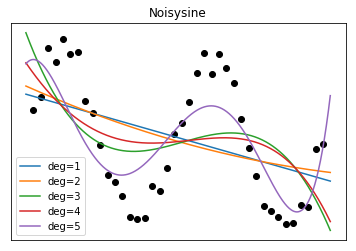

In [134]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

def task3_noisysine():
    ress_x = []
    ress_y = []
    print("Noisysine LASSO")
    for degree in range(1, 6):
        alphas = [10 ** (-i) for i in range(10)]
        best_r2 = None
        best_alpha = None
        noisysine_values_train_trans = PolynomialFeatures(degree=degree).fit_transform(noisysine_values_train)
        noisysine_values_test_trans = PolynomialFeatures(degree=degree).fit_transform(noisysine_values_test)
        for alpha in alphas:    
            regr = Lasso(alpha=alpha, max_iter=100000, tol=0.0001)
            regr.fit(noisysine_values_train_trans, noisysine_labels_train)
            labels = regr.predict(noisysine_values_test_trans)
            r2 = r2_score(noisysine_labels_test, labels)

            if best_r2 is None or r2 > best_r2:
                best_r2 = r2
                best_alpha = alpha
        
        best_regr = Lasso(alpha=best_alpha, max_iter=100000, tol=0.0001)
        best_regr.fit(noisysine_values_train_trans, noisysine_labels_train)
        labels = best_regr.predict(noisysine_values_test_trans)
        r2 = r2_score(noisysine_labels_test, labels)
        print("deg=" + str(degree) + "; r2=" + str(r2) + "; best_alpha=" + str(best_alpha))
        values_min, values_max = noisysine_values.min() - 1, noisysine_values.max() + 1
        res_x = np.arange(values_min, values_max, 0.01).reshape(-1, 1)
        res_x_trans = PolynomialFeatures(degree=degree).fit_transform(res_x)
        res_y = best_regr.predict(res_x_trans)
        ress_x.append(res_x)
        ress_y.append(res_y)

    plot_regressions(noisysine_values, noisysine_labels, ress_x, ress_y, "Noisysine")

task3_noisysine()


In [136]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

def task3_hydrodynamics():
    print("Hydrodynamics LASSO")
    for degree in range(1, 3):
        alphas = [10 ** (-i) for i in range(10)]
        best_r2 = None
        best_alpha = None
        hydrodynamics_values_train_trans = PolynomialFeatures(degree=degree).fit_transform(hydrodynamics_values_train)
        hydrodynamics_values_test_trans = PolynomialFeatures(degree=degree).fit_transform(hydrodynamics_values_test)
        for alpha in alphas:    
            regr = Lasso(alpha=alpha, max_iter=100000, tol=0.0001)
            regr.fit(hydrodynamics_values_train_trans, hydrodynamics_labels_train)
            labels = regr.predict(hydrodynamics_values_test_trans)
            r2 = r2_score(hydrodynamics_labels_test, labels)

            if best_r2 is None or r2 > best_r2:
                best_r2 = r2
                best_alpha = alpha
        
        best_regr = Lasso(alpha=best_alpha, max_iter=100000, tol=0.0001)
        best_regr.fit(hydrodynamics_values_train_trans, hydrodynamics_labels_train)
        labels = best_regr.predict(hydrodynamics_values_test_trans)
        r2 = r2_score(hydrodynamics_labels_test, labels)
        print("deg=" + str(degree) + "; r2=" + str(r2) + "; best_alpha=" + str(best_alpha))

task3_hydrodynamics()


Hydrodynamics LASSO
deg=1; r2=0.6327035007071639; best_alpha=0.1
deg=2; r2=0.9005488183375147; best_alpha=0.001


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [4]:

def read_tsp():
    data = []
    
    with open(data_folder + "tsp.csv", newline='') as csv_file:
        dataset_reader = csv.reader(csv_file, delimiter=',')
        for row in dataset_reader:
            row = list(map(float, row))
            data.append(np.array(row[1:]))

    return np.array(data)

In [5]:
tsp_values = read_tsp()


In [8]:
from scipy.spatial.distance import cityblock

def L1(values):
    return np.sum([cityblock(values[i], values[i + 1]) for i in range(len(values) - 1)])


In [9]:
def plot_path(values, title):
    print("L1 dist: " + str(L1(values)))
    path = np.array([[values[i // 2][0], values[i // 2 + i % 2][1]] for i in range(2 * len(values) - 1)])
    plt.plot(path[:, 0], path[:, 1], color='blue')
    plt.scatter(values[:, 0], values[:, 1], color='red')
    plt.title(title)
    plt.show()


L1 dist: 28865.0


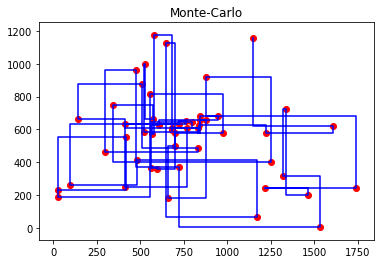

In [161]:

def monte_carlo(iters):
    best_values = tsp_values.copy()
    np.random.shuffle(best_values)
    current_values = best_values.copy()
    best_score = L1(best_values)
    
    for i in range(iters):
        np.random.shuffle(current_values)
        current_score = L1(current_values.copy())
        if current_score < best_score:
            best_score = current_score
            best_values = current_values.copy()
            
    return best_values

plot_path(monte_carlo(10000), "Monte-Carlo")


L1 dist: 32775.0


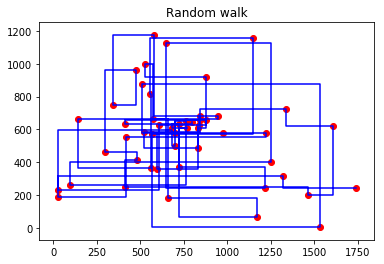

In [171]:

def rand_walk():
    all_vertices = range(tsp_values.shape[0])
    order = []
    left = [i for i in all_vertices]
    
    for i in reversed(all_vertices):
        next_ = int(np.random.uniform(0, i + 1))
        order.append(left[next_])
        left.remove(left[next_])
        
    return tsp_values[order]

plot_path(rand_walk(), "Random walk")


L1 dist: 12210.0


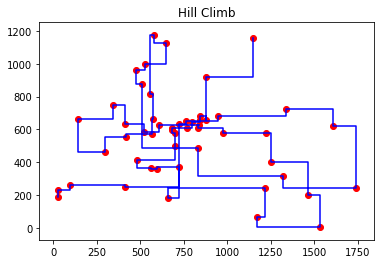

In [251]:
def hill_climb():
    best_values = tsp_values.copy()
    np.random.shuffle(best_values)
    best_score = L1(best_values)
    improved=True
    
    while improved:
        improved = False
        
        for i in range(tsp_values.shape[0]):
            for j in range(tsp_values.shape[0]):
                if i == j:
                    continue
                cur = best_values.copy()
                cur[[j, i]] = cur[[i, j]]
                next_score = L1(cur)
                
                if next_score < best_score:
                    best_values = cur
                    best_score = next_score
                    improved = True
    
    return best_values

plot_path(hill_climb(), "Hill Climb")


L1 dist: 16720.0


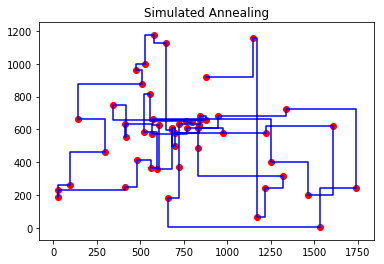

In [14]:
T_max = 10000
T_min = 0.00001
        
def get_temperature(it, iters):
    return T_max - (T_max - T_min) * it / iters

def simulated_annealing(iters):
    best_values = tsp_values.copy()
    np.random.shuffle(best_values)
    best_score = L1(best_values)
    
    for i in range(iters):
        j = np.random.randint(0, tsp_values.shape[0])
        next_ = []
        for k in range(tsp_values.shape[0]):
            if j == k:
                continue
            cur = best_values.copy()
            cur[[k, j]] = cur[[j, k]]
            next_.append(cur)
        
        T = get_temperature(i, iters)
        deltas = np.exp(np.array([(best_score - L1(next_[i])) / T for i in range(len(next_))]))
        probs = deltas/sum(deltas)
        
        best_values = next_[np.random.choice(len(next_), p=probs)]
        best_score = L1(best_values)
    
    return best_values

plot_path(simulated_annealing(1000), "Simulated Annealing")

L1 dist: 11035.0


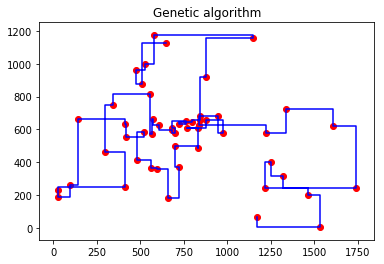

In [73]:
class Genetic:
    def __init__(self, generations, population_size, prob):
        self.generations = generations
        self.population_size = population_size
        self.prob = prob
    
    def cross(self, a, b):
        a, b = a.copy(), b.copy()
        index = np.random.randint(0, a.shape[0] - 1)
        
        to1 = []
        for i in range(a.shape[0]):
            found = False
            for p in a[:index]:
                if np.array_equal(b[i], p):
                    found = True
                    
            if not found:
                to1.append(b[i].copy())
                
        to2 = []
        for i in range(a.shape[0]):
            found = False
            for p in b[:index]:
                if np.array_equal(a[i], p):
                    found = True
                    
            if not found:
                to2.append(a[i].copy())
                
        for i in range(index, a.shape[0]):
            a[i] = to1[i - index]
            b[i] = to2[i - index]
            
        return a, b

    def mutate(self, a, b):
        a = a.copy()
        b = b.copy()
        if np.random.uniform() < self.prob:
            i1, i2 = np.random.choice(range(len(a)), 2)
            start = min(i1,i2)
            end = max(i1, i2)
            a[start: end] =  a[start: end][::-1]
            
        if np.random.uniform() < self.prob:
            i1, i2 = np.random.choice(range(len(b)), 2)
            start = min(i1,i2)
            end = max(i1, i2)
            b[start: end] =  b[start: end][::-1]
        return a, b

    def fit(self):
        population = np.array([np.random.permutation(tsp_values) for _ in range(self.population_size)])
        scores = np.array([L1(population[i]) for i in range(self.population_size)])
        
        for i in range(self.generations):
            order = np.argsort(scores)
            population[order[-1]], population[order[-2]] = self.mutate(*self.cross(population[order[0]], population[order[1]]))
            scores = np.array([L1(population[i]) for i in range(self.population_size)])
        
        return population[np.argsort(scores)[0]] 
    
plot_path(Genetic(20000, 25, 0.005).fit(), "Genetic algorithm")